In [34]:
import torch

In [35]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics, model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns



In [36]:
# extract the data from url and save it in a csv file
## TITANIC  DATA SET

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

data =pd.read_csv(url)

data.head()




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
# finding null value in the data set and replacing them with 'NaN'  and then dropping these columns from our dataset as they are not useful for us to use in our model.

data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [38]:
##  handling missing values by using dropna function which will drop all rows that have any null value in it and then we can see that the dataframe has been reduced to only 6 columns as they are now free from any null value in them.    


data['Age'].fillna(data['Age'].median(), inplace=True)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [40]:
  # Drop 'Cabin' due to a high percentage of missing values
data.drop('Cabin', axis=1, inplace=True)

In [41]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [42]:
# Fill 'Embarked' with the mode value
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [43]:
# Check for null values again
print("\nMissing Values After Imputation:")
print(data.isnull().sum())


Missing Values After Imputation:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [44]:
# Basic statistics
print("\nBasic Statistics:")
print(data.describe())


Basic Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


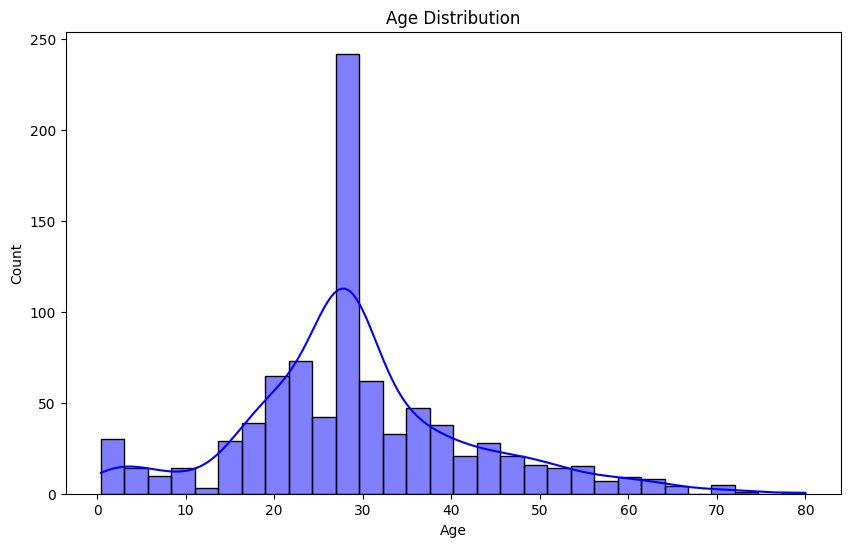

In [45]:
# Distribution of numerical features
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.show()

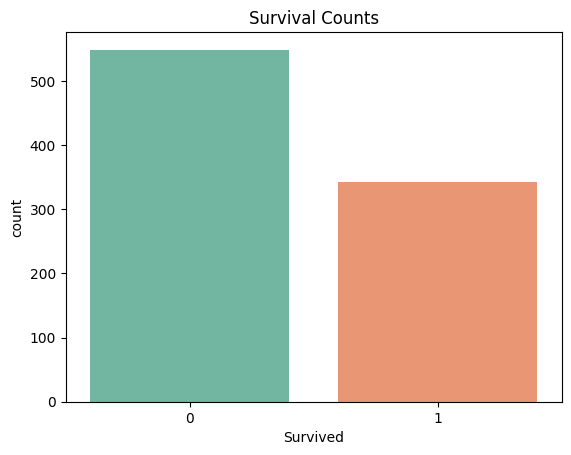

In [46]:
# Survival counts
sns.countplot(x='Survived', data=data, palette='Set2')
plt.title('Survival Counts')
plt.show()

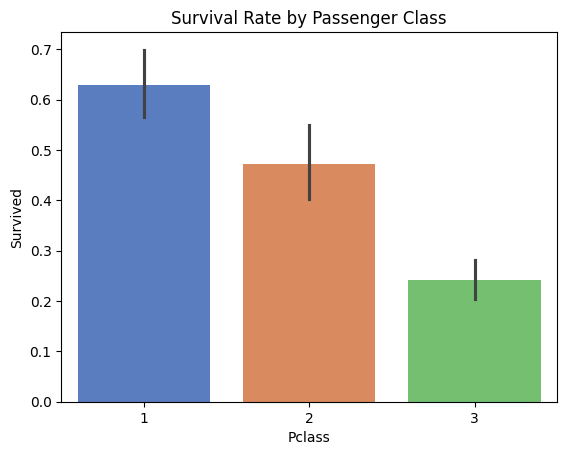

In [47]:
# Relationship between survival and other features
sns.barplot(x='Pclass', y='Survived', data=data, palette='muted')
plt.title('Survival Rate by Passenger Class')
plt.show()

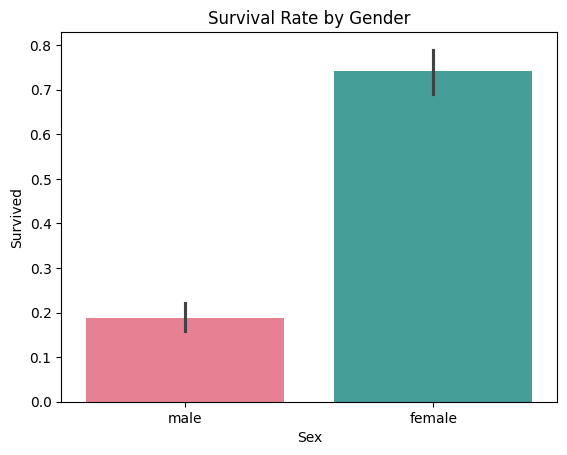

In [48]:
sns.barplot(x='Sex', y='Survived', data=data, palette='husl')
plt.title('Survival Rate by Gender')
plt.show()

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [51]:
# Drop unnecessary non-numeric columns
data.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [52]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [53]:
# Encode categorical variables
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

In [54]:
# Features and target variable
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data['Survived']

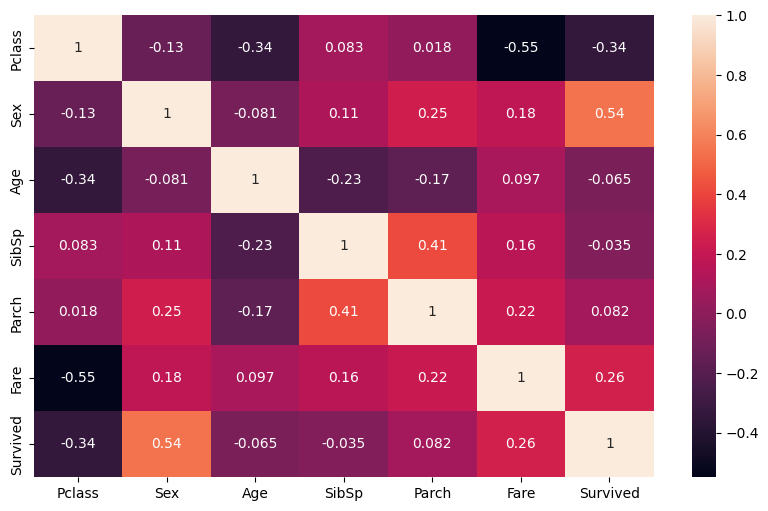

In [56]:
# correlation using heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']].corr(), annot=True)
plt.show()

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [59]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# standardization of features using sklearn's StandardScaler classfrom sk

sk =StandardScaler()
X_train = sk.fit_transform(X_train)
X_test = sk.transform(X_test)


In [69]:
# Initialize and train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [70]:
# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.80

Confusion Matrix:
[[90 15]
 [21 53]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [71]:
# Visualize feature importance
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

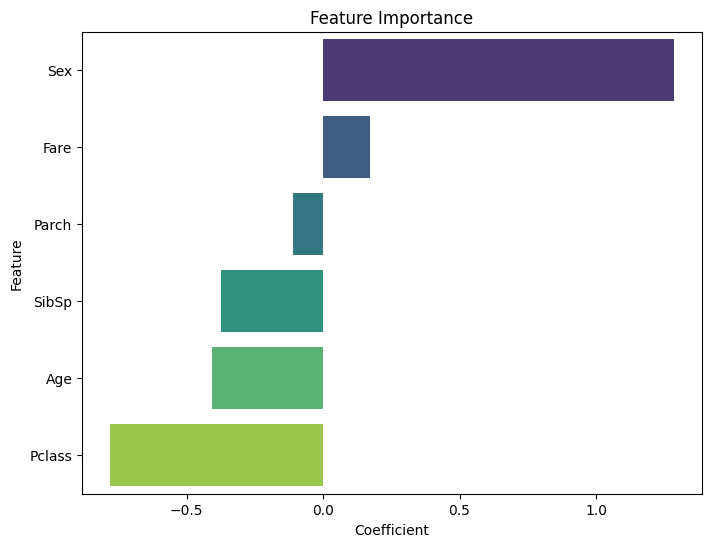

In [72]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')
plt.title('Feature Importance')
plt.show()

<!-- @format -->

Explanation:
EDA:

Missing values in Age are imputed using the median.

Cabin is dropped due to excessive missing values.

Visualization shows distributions and relationships (e.g., gender vs survival).

Logistic Regression:

The dataset is encoded to handle categorical variables.

Logistic regression predicts survival based on Pclass, Sex, Age, etc.

Model evaluation includes metrics like accuracy and a confusion matrix to understand performance.
